In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from proj1_helpers import *
from helpers2 import *
from preprocessing import *

In [10]:
#data_folder = Path("../data/")
DATA_TRAIN_PATH = "../data/train.csv"
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Data analysis

In [5]:
print(y)
print(np.shape(y))
print(np.shape(tX))
print(tX.dtype)
print(y.dtype)

[ 1. -1. -1. ...  1. -1. -1.]
(250000,)
(250000, 30)
float64
float64


In [6]:
feature_names = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 
                 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 
                 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 
                 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 
                 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
                 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

for i, name in enumerate(feature_names):
    print(i, feature_names[i])


0 DER_mass_MMC
1 DER_mass_transverse_met_lep
2 DER_mass_vis
3 DER_pt_h
4 DER_deltaeta_jet_jet
5 DER_mass_jet_jet
6 DER_prodeta_jet_jet
7 DER_deltar_tau_lep
8 DER_pt_tot
9 DER_sum_pt
10 DER_pt_ratio_lep_tau
11 DER_met_phi_centrality
12 DER_lep_eta_centrality
13 PRI_tau_pt
14 PRI_tau_eta
15 PRI_tau_phi
16 PRI_lep_pt
17 PRI_lep_eta
18 PRI_lep_phi
19 PRI_met
20 PRI_met_phi
21 PRI_met_sumet
22 PRI_jet_num
23 PRI_jet_leading_pt
24 PRI_jet_leading_eta
25 PRI_jet_leading_phi
26 PRI_jet_subleading_pt
27 PRI_jet_subleading_eta
28 PRI_jet_subleading_phi
29 PRI_jet_all_pt


The training data set is composed of : 
* a y vector of length 250'000 and type float
* a tX float matrix of 250'000 rows and 30 columns

It means that our data set is composed of 250'000 different obsevations of 30 different features. In the rest of the notebook, we name the features by their index number. So, it means from the feature 0 from the feature  29.

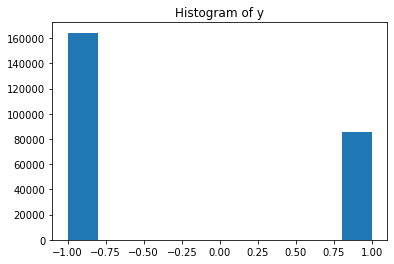

In [7]:
plt.hist(y)
plt.title('Histogram of y')
plt.show()

There is more y = -1 than y = 1 in the data, so there is more y = 'b' (background) than y = 's' (signal). So, we have to pay attention to normalize the data in order to compare them in the next plots.

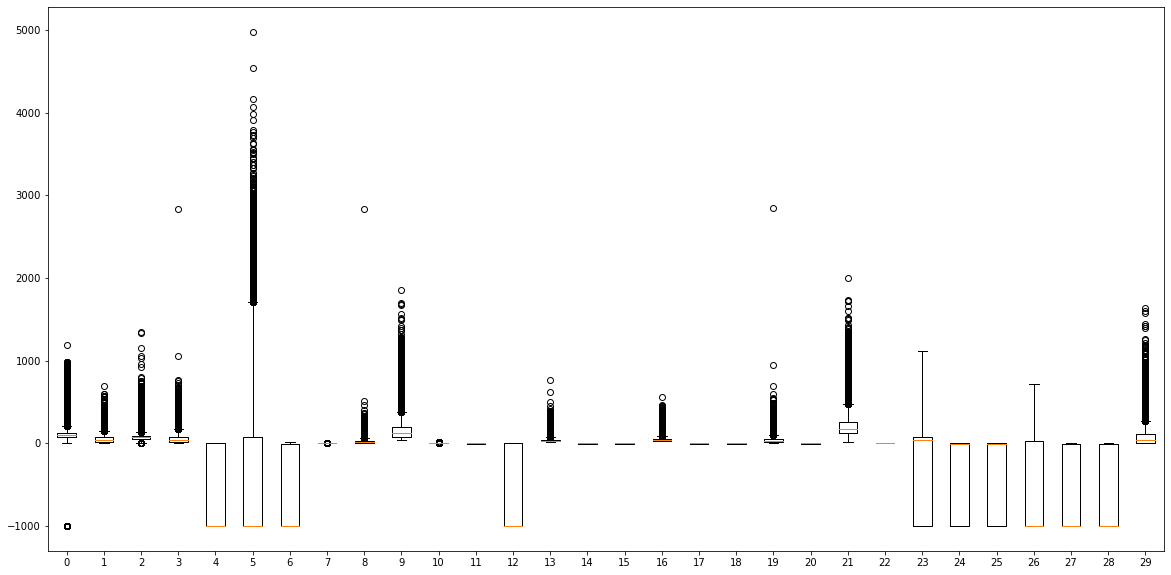

In [8]:
plt.figure(figsize=(20, 10))
ind = np.arange(30)
plt.boxplot(tX[:,], labels = ind)

plt.show()

There are many outliers depending on the feature. There are also feature that has a long interquantile range. Maybe we have to treat these features in order to be more efficient in our futur predictions. Let's do more plots to be have a better idea :

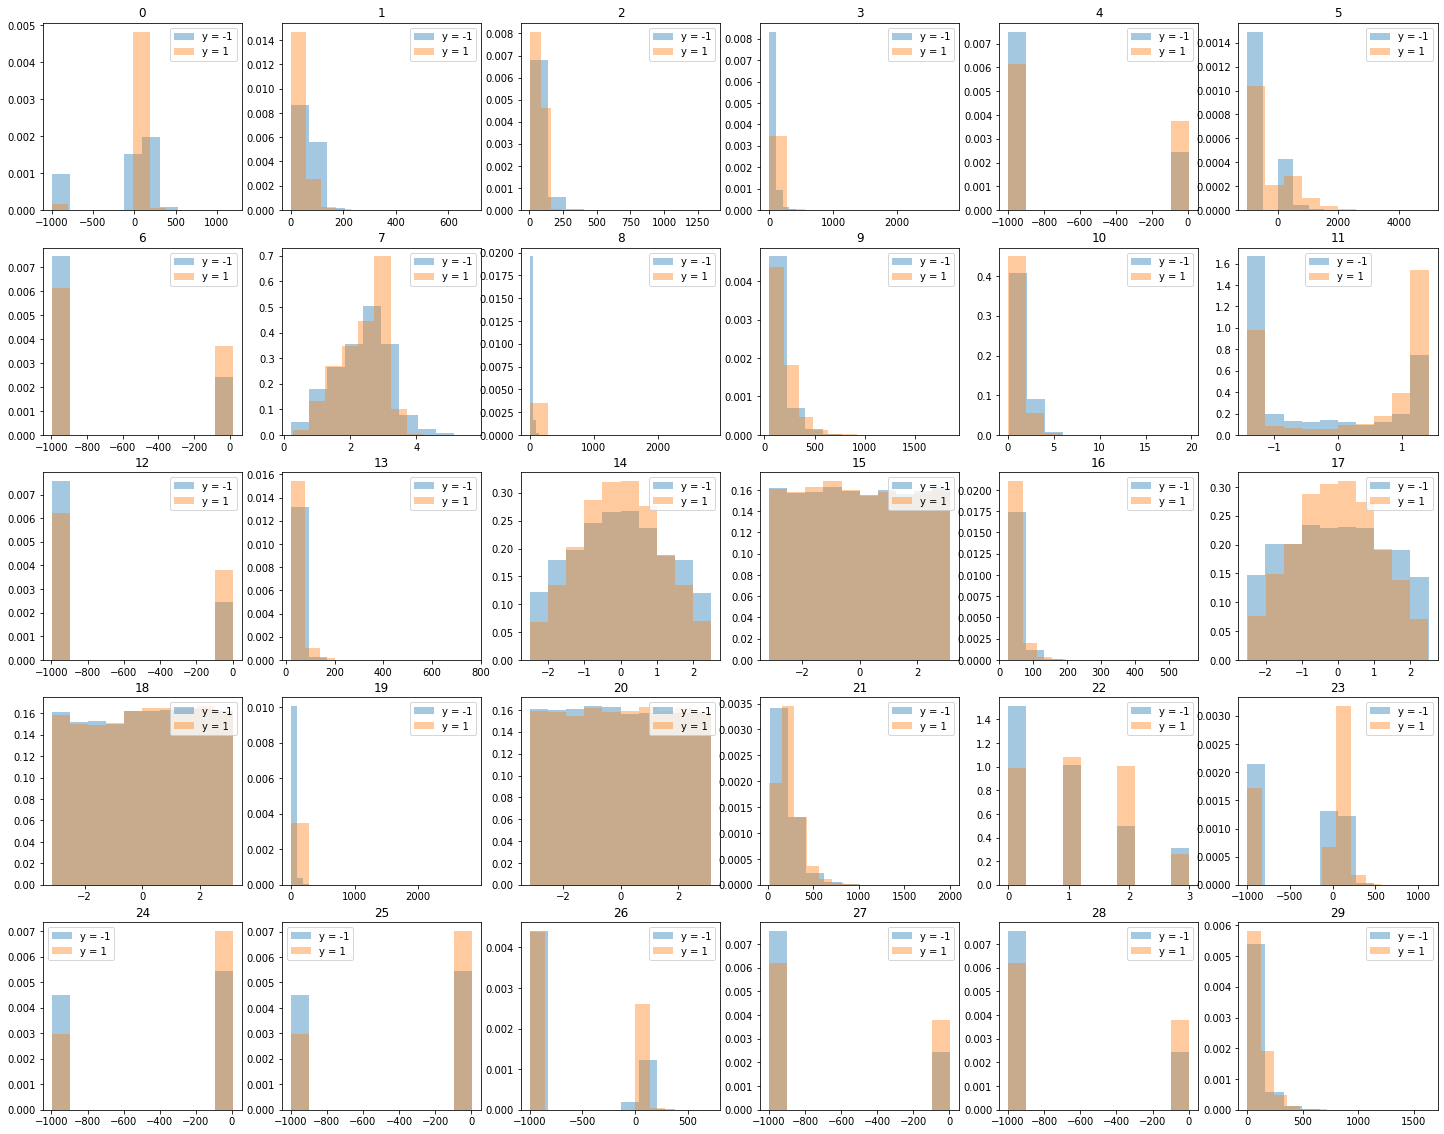

In [137]:
ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

fig, axs = plt.subplots(5, 6, figsize=(25,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].hist(tX_2[:,n], alpha=0.4, density=True, label=['y = -1'])
        axs[i,j].hist(tX_1[:,n], alpha=0.4, density=True, label=['y = 1'])
        axs[i,j].legend()
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

By plotting the normalized histograms of the features with a color for each y, we can see that there are useless features as they have almost the same distribution for y=1 than for y = -1. We can cut feature 15, 18, 20. 


There are also features that are very inequally distributed with value that are about -1000 and values around 0 ; it can be problematic for the prediction with such a large gap between values of a single distribution. Moreover, there is not a big difference in the distribution of y=1 and y=-1. Maybe it can be useful to put off these big negative values of these features. The features in question are : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28.


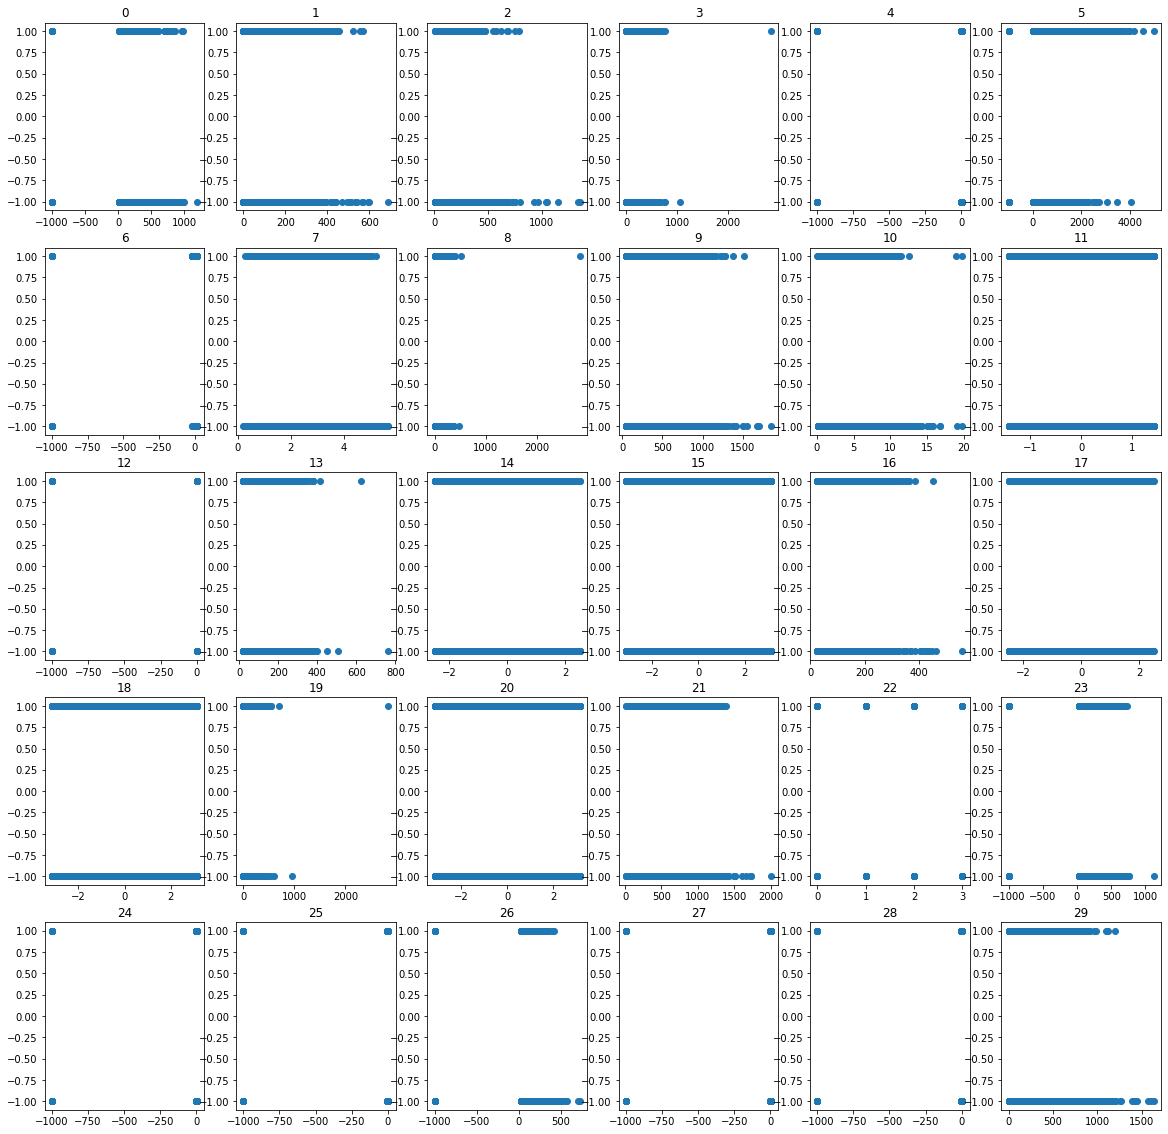

In [138]:
fig, axs = plt.subplots(5, 6, figsize=(20,20))

n = 0
for i in range(5) :
    for j in range(6) :
        axs[i,j].scatter(tX[:,n], y)
        axs[i,j].set_title(n)
        n = n + 1
plt.show()

These plots confirm the obsevations that we made in the previous plot ; no difference of the distribution of y for features 15, 18, 20 and very large gap in the distributions of features : 0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28. We can also see that the feature 22 has an atypical distribution.

## Data filtering

### Outliers

In [11]:
def nb_outliers(tX, outlier) : 
    sum = 0
    nb_outliers = []
    for col in range(tX.shape[1]) :
        sum = np.where(tX[:,col] == outlier)[0].shape
        nb_outliers.append(sum)   
    print(nb_outliers)
    print(np.where(tX==outlier)[0].shape)

out = -999

print('number of -999 in the entire matrix :')
nb_outliers(tX, out)

ind_1 = np.where(y == 1)
ind_2 = np.where(y == -1)
tX_1 = tX[ind_1[0],:]
tX_2 = tX[ind_2[0],:]

print('number of -999 in the rows where y = 1 :')
nb_outliers(tX_1, out)
print('number of -999 in the rows where y = -1 :')
nb_outliers(tX_2, out)

number of -999 in the entire matrix :
[(38114,), (0,), (0,), (0,), (177457,), (177457,), (177457,), (0,), (0,), (0,), (0,), (0,), (177457,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (99913,), (99913,), (99913,), (177457,), (177457,), (177457,), (0,)]
(1580052,)
number of -999 in the rows where y = 1 :
[(2835,), (0,), (0,), (0,), (53202,), (53202,), (53202,), (0,), (0,), (0,), (0,), (0,), (53202,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (25492,), (25492,), (25492,), (53202,), (53202,), (53202,), (0,)]
(451725,)
number of -999 in the rows where y = -1 :
[(35279,), (0,), (0,), (0,), (124255,), (124255,), (124255,), (0,), (0,), (0,), (0,), (0,), (124255,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (74421,), (74421,), (74421,), (124255,), (124255,), (124255,), (0,)]
(1128327,)


We have a problem with features  0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28. They are inequally distributed; they have a lot of -999 values and the rest is values around 0. So, here we can see how much of these -999 there are. We can see that the -999 appear only in the features that we identified with the histograms. It seems that there is a correlation between features as many features have the same number of -999. We can also see that there is more -999 in the obsevations where y=-1, so we have to take this into account when we filter the data. As there are many -999, we can't delete the rows where there is -999 because we will loose too much information.
After checking the documentation, we found that the number of -999 values is linked to the feature 22. Thus, we create a function to separate the data in sets according to the feature 22 value. Moreover, verification with the next histogramms showed us that some features were then constant in some sets. We delete these features.

In [21]:
def histograms(y, tX):
    ind_1 = np.where(y == 1)
    ind_2 = np.where(y == -1)
    tX_1 = tX[ind_1[0],:]
    tX_2 = tX[ind_2[0],:]

    fig, axs = plt.subplots(5, 6, figsize=(25,20))

    n = 0
    for i in range(5) :
        for j in range(6) :
            axs[i,j].hist(tX_2[:,n], alpha=0.4, density=True, label=['y = -1'])
            axs[i,j].hist(tX_1[:,n], alpha=0.4, density=True, label=['y = 1'])
            axs[i,j].legend()
            axs[i,j].set_title(n)
            n = n + 1
            if n>=tX.shape[1]: break
        if n>=tX.shape[1]: break
    plt.show()

We separate the dataset into 3 sets according to the PRI_jet_num feature. Features with constant values and column 22 are deleted. So, this function get also rid of the features whose ratio of -999 is 1 in the sets

Set 1
[False False False False False False False False False False False False
 False False False False False False]


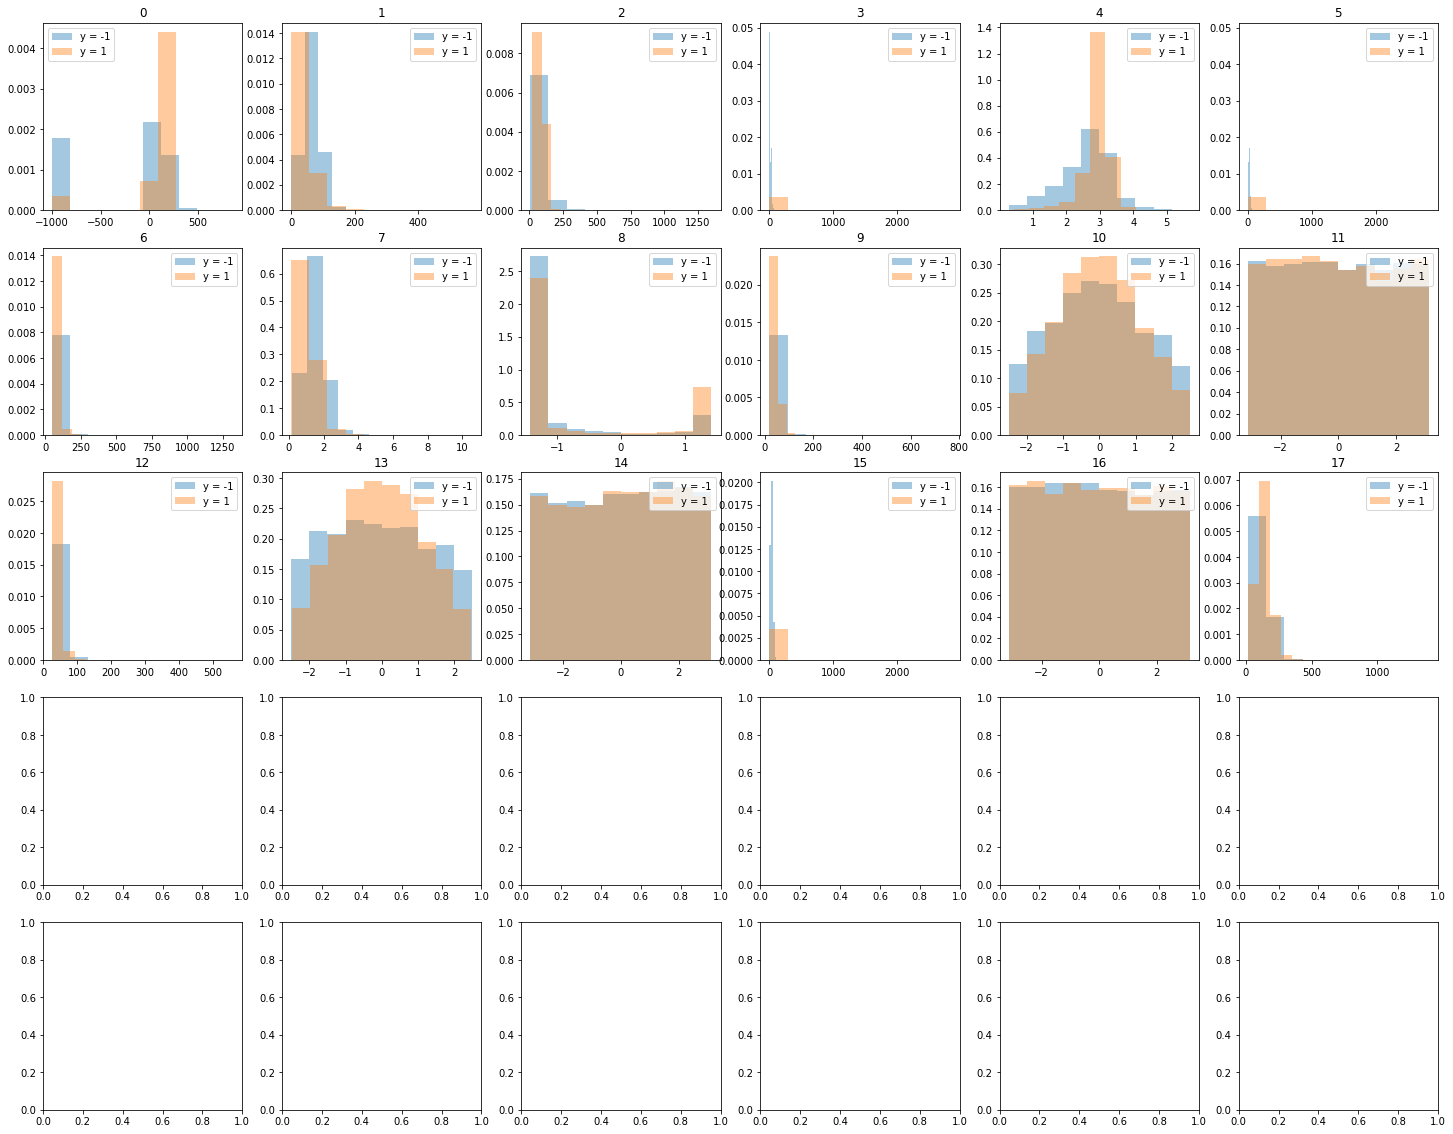


Set 2
[False False False False False False False False False False False False
 False False False False False False False False False False]


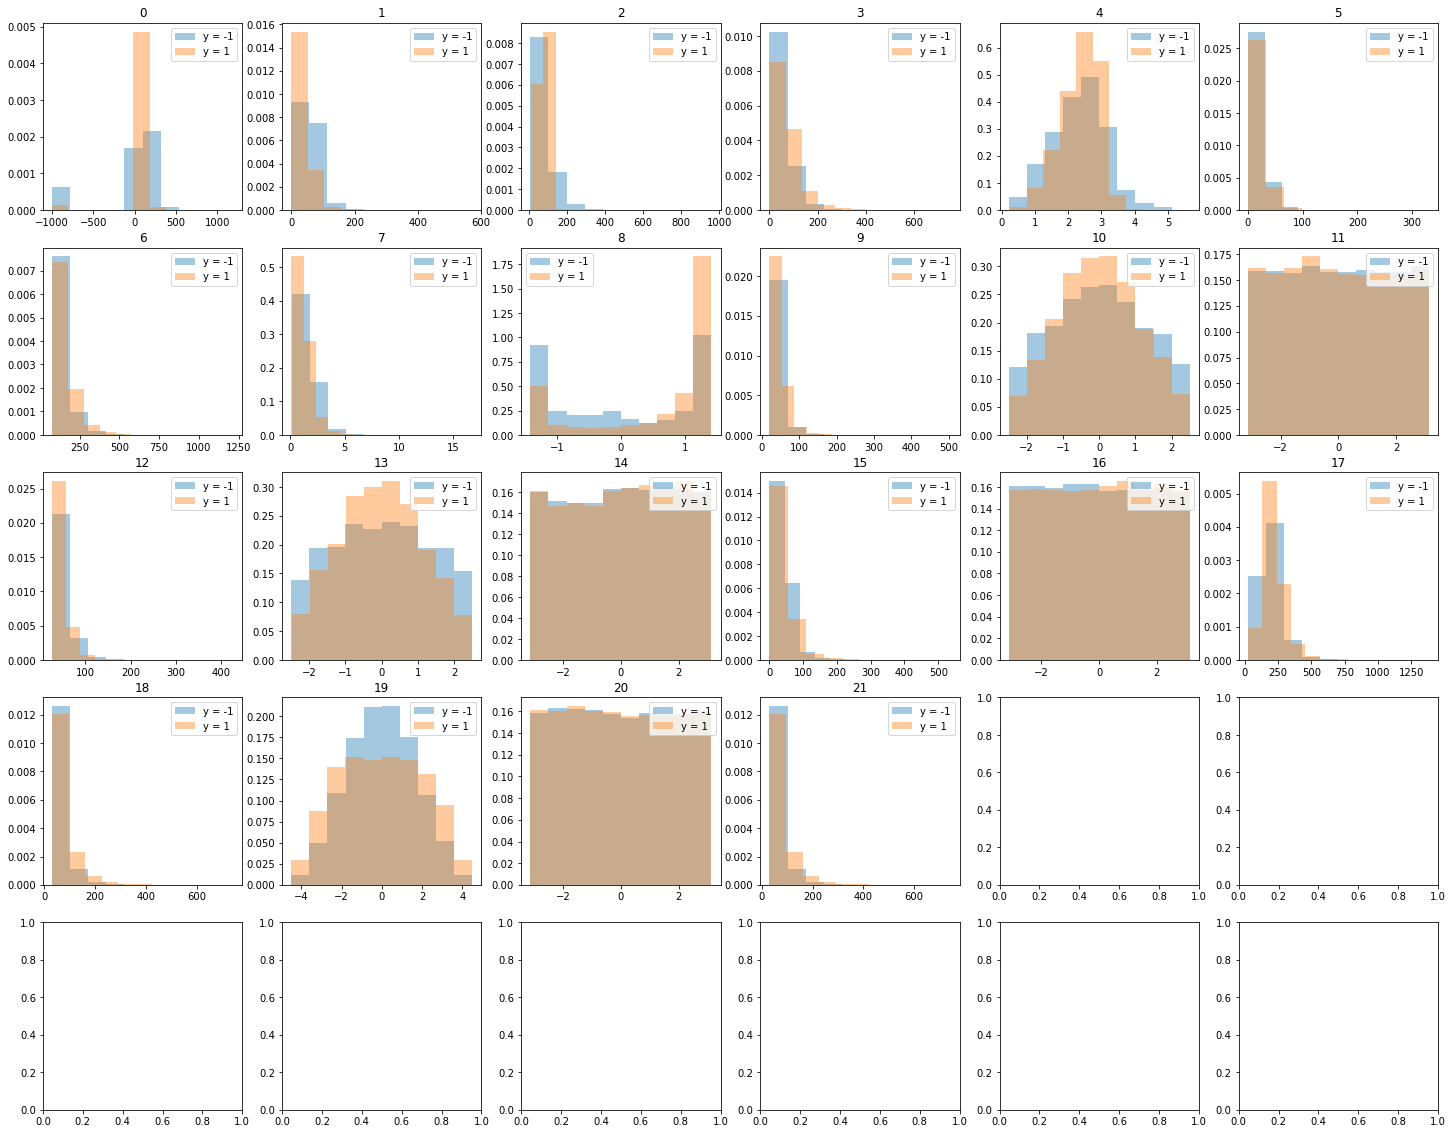


Set 3
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


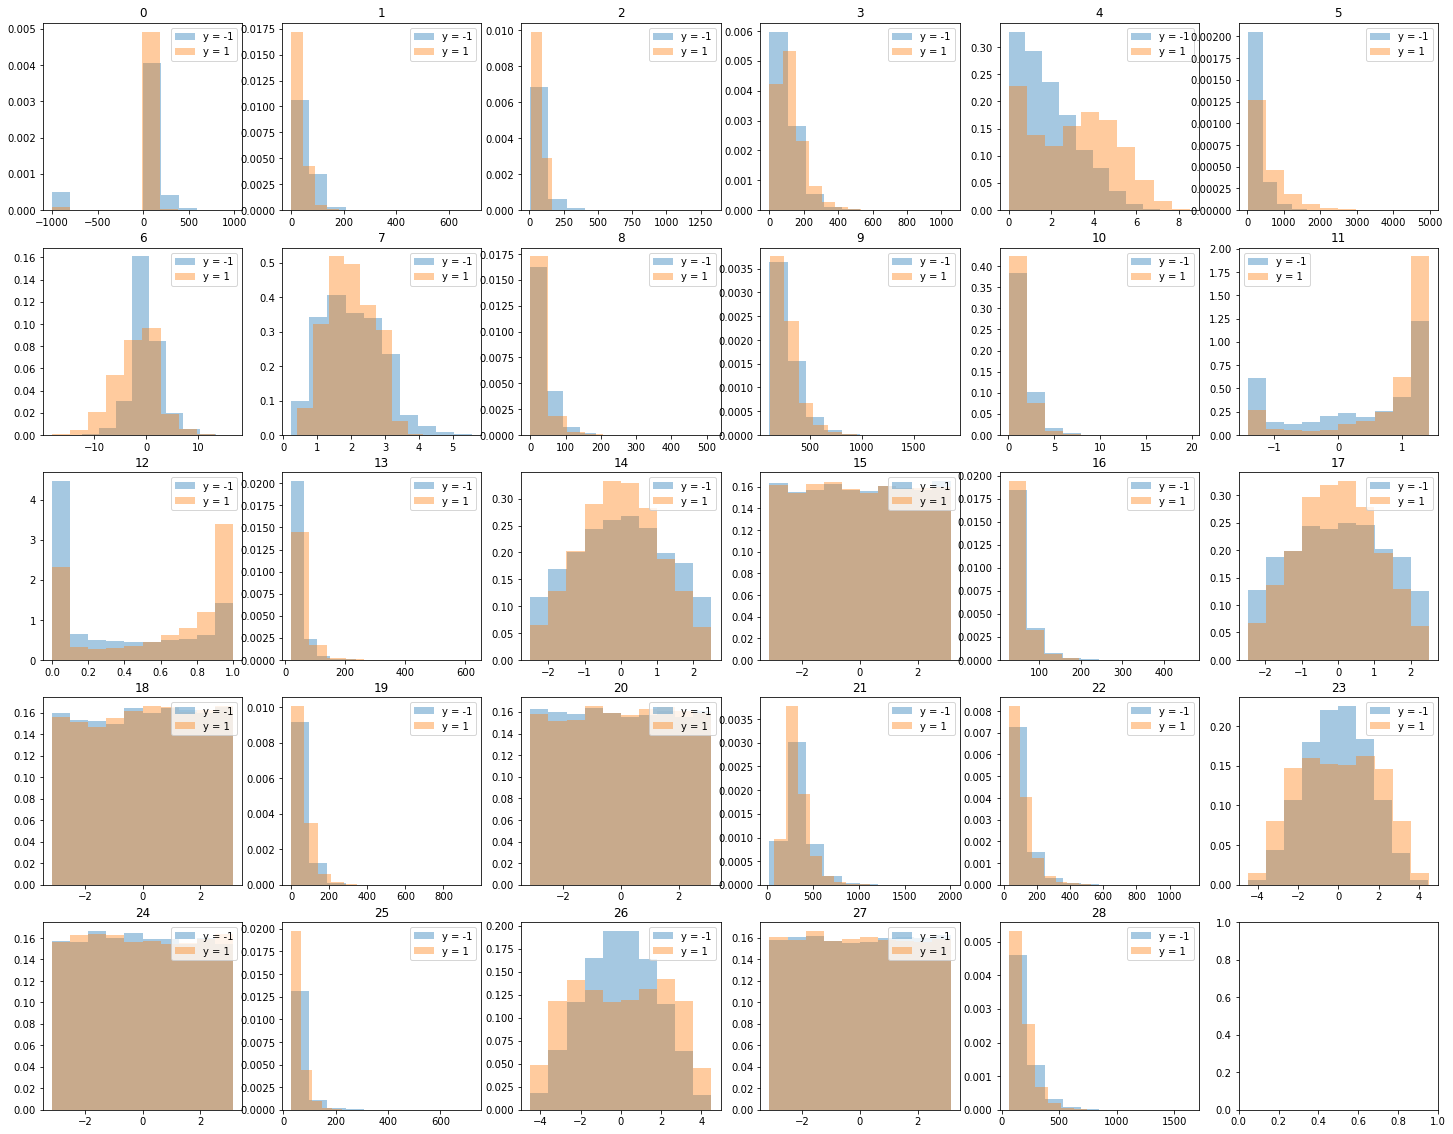

In [22]:
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y, ids)

print('Set 1')
print(np.all(set1_x==set1_x[0], axis = 0))
histograms(set1_y, set1_x)

print('\nSet 2')
print(np.all(set2_x==set2_x[0], axis = 0))
histograms(set2_y, set2_x)

print('\nSet 3')
print(np.all(set3_x==set3_x[0], axis = 0))
histograms(set3_y, set3_x)

In order to filter the data, we want to get rid of the -999 values left, but we can't just delete the rows. So, we have the idea to replace the -999 by the mean of the rest of values of the feature. As there is a significant difference of amount of -999 in between y=1 and y=-1 in certain features, we calculate the mean for the rows where y = 1 and y = -1 separatly.

Then, we want to change the distribution of the data. 
We standardize the data. It can be a good idea because the features are not all in the same range of values and it can create disproportionality between the importance of the features.
Some feature have a skewed distribution so a log tranformation will be applied. The featres in question are 1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29.

As we see above in the histograms, some features seem to be useless as they have a similar distribution between the y = 1 and y = -1. So, it is useful to have function that cut or keep some parameters.

## Fonctions 

In [13]:
from implementations import *
from cross_validation import *
to_log = [1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29]

### Least squares

The best results for least squares regression is with the tX matrix which is standardize, filter with filtering_with_mean_bis function and whose features 15, 18, 20 are cut :

In [14]:
tX_cut = cut(tX, [15,18,20])
x_essai = std(filtering_with_mean_bis(tX_cut, y))
degrees = np.arange(1,11)
# Cross-validation on the degrees
degree_opt, _ = best_degree_selection(y, x_essai, degrees, k_fold=10, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
# Best degree model
tX_poly = build_poly(x_essai, degree_opt)
w_ls, loss_ls = least_squares(y, tX_poly)
print("Least square loss rmse {loss}".format(loss=np.sqrt(loss_ls)))
degree_ls = degree_opt

best rmses [0.80948237155391, 0.8367349211100976, 2.1056028200718133, 7.584563594896589, 112.96122840799619, 21513.2210588402, 640516.9061716219, 17066015.327445216, 849823489.373302, 11729544171.634888]
Cross validation finished: optimal degree 1
Least square loss rmse 0.572303010058039


The least squares best model on the entire is degree 1 ; its accuracy is : 0.606. Let's try the same model but applied to the 3 different sets according to the PRI_jet_num parameter thanks to the separate_sets function. We sould normally improve our results : 

In [19]:
tX_cut = cut(tX, [15,18,20])

# Separation into set according to the PRI_jet_num parameter, as it is the 22th column of the entire matrix
# if we cut 3 paramaters before the 22th, PRI_jet_num is the 22-3th now
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX_cut, y, ids, 22-3)

def best_filtering_ls(set_x, set_y) :
        set_x = std(filtering_with_mean_bis(set_x, set_y))
        return set_x

print('Set 1')
set1_x_ls = best_filtering_ls(set1_x, set1_y)

print('\nSet 2')
set2_x_ls = best_filtering_ls(set2_x, set2_y)

print('\nSet 3')
set3_x_ls = best_filtering_ls(set3_x, set3_y)

Set 1
(99913, 15)
outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(99913, 15)

Set 2
(77544, 19)
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(77544, 19)

Set 3
(72543, 26)
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
(72543, 26)


Let's do least squares regression for each set : 

In [16]:
degrees = np.arange(1,11)
# Cross-validation on the degrees
degree_opt, _ = best_degree_selection(set1_y, set1_x_ls, degrees, k_fold=10, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
# Best degree model 
tX_poly = build_poly(set1_x_ls, degree_opt)
w_set1_ls, loss_ls = least_squares(set1_y, tX_poly)
print("Least square loss rmse {loss}".format(loss=np.sqrt(loss_ls)))
degree_set1_ls = degree_opt

best rmses [0.6992125028495939, 1.9838337029939577, 49.0950398443345, 680.4586172329542, 303224.19185779814, 17472346.266190786, 1260372331.5143912, 149649086899.284, 14771744591044.932, 992792139909914.0]
Cross validation finished: optimal degree 1
Least square loss rmse 0.49359178738866794


In [17]:
degrees = np.arange(1,11)
# Cross-validation on the degrees
degree_opt, _ = best_degree_selection(set2_y, set2_x_ls, degrees, k_fold=10, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
# Best degree model
tX_poly = build_poly(set2_x_ls, degree_opt)
w_set2_ls, loss_ls = least_squares(set2_y, tX_poly)
print("Least square loss rmse {loss}".format(loss=np.sqrt(loss_ls)))
degree_set2_ls = degree_opt

best rmses [0.8627394973460675, 0.8194579182072766, 0.8118323371013689, 0.8032701421404125, 0.8242480764420067, 0.8875691794942945, 1.8982183184773578, 3.7796703449611853, 8.007527383460971, 6.076619719165262]
Cross validation finished: optimal degree 4
Least square loss rmse 0.5636950146943955


In [18]:
degrees = np.arange(1,11)
# Cross-validation on the degrees
degree_opt, _ = best_degree_selection(set3_y, set3_x_ls, degrees, k_fold=10, lambdas=0, fonction=0)
print("Cross validation finished: optimal degree {d}".format(d=degree_opt))
# Best degree model
tX_poly = build_poly(set3_x_ls, degree_opt)
w_set3_ls, loss_ls = least_squares(set3_y, tX_poly)
print("Least square loss rmse {loss}".format(loss=np.sqrt(loss_ls)))
degree_set3_ls = degree_opt

best rmses [0.8494265790433897, 0.8048402895290894, 0.7838667566556834, 0.7804477195530966, 0.7723920605331281, 1.1329656610628462, 1.1764287631331443, 3.804495786140791, 17.16800592264092, 52.071429055052455]
Cross validation finished: optimal degree 5
Least square loss rmse 0.5401761404390791


The least square best model (standardize + filter_with_mean_bis + cut 15,18,20) with separate_sets is :
* set 1 : degree 1
* set 2 : degree 4
* set 3 : degree 5

We have a better accuracy : 0.683

### Ridge regression 

The best results for Ridge regression is with tX that is only filtered by filtering_with_mean_bis function : 

In [19]:
degrees = np.arange(1,8)
x_essai = filtering_with_mean_bis(tX, y)
# Cross-validation on the degrees and the lambdas
degree_opt, lambda_opt = best_degree_selection(y, x_essai, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
# Best degree and lambda model
x_essai = build_poly(x_essai, degree_opt)
w_rr, loss_rr = ridge_regression(y, x_essai, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
degree_rr = degree_opt

KeyboardInterrupt: 

Let's look if we can improve the results with the separation of tX into sets according to the feature 22 (PRI_jet_num) : 

In [ ]:
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y, ids)
degrees = np.arange(1,8)

def best_filtering_rr(set_x, set_y) :
        set_x = filtering_with_mean_bis(set_x, set_y)
        return set_x
    

print('Set 1')
set1_x_rr = best_filtering_rr(set1_x, set1_y)

print('\nSet 2')
set2_x_rr = best_filtering_rr(set2_x, set2_y)

print('\nSet 3')
set3_x_rr = best_filtering_rr(set3_x, set3_y)

Ridge regression according to the different sets : 

In [ ]:
degrees = np.arange(1,8)
x_essai = set1_x_rr
y = set1_y
# Cross-validation on the degrees and the lambdas
degree_opt, lambda_opt = best_degree_selection(y, x_essai, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
# Best degree and lambda model
x_essai = build_poly(x_essai, degree_opt)
w_rr_set1, loss_rr = ridge_regression(y, x_essai, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
lambda_rr_set1 = lambda_opt
degree_rr_set1 = degree_opt

In [ ]:
degrees = np.arange(1,8)
x_essai = set2_x_rr
y = set2_y
# Cross-validation on the degrees and the lambdas
degree_opt, lambda_opt = best_degree_selection(y, x_essai, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
# Best degree and lambda model
x_essai = build_poly(x_essai, degree_opt)
w_rr_set2, loss_rr = ridge_regression(y, x_essai, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
lambda_rr_set2 = lambda_opt
degree_rr_set2 = degree_opt

In [ ]:
degrees = np.arange(1,8)
x_essai = set3_x_rr
y = set3_y
# Cross-validation on the degrees and the lambdas
degree_opt, lambda_opt = best_degree_selection(y, x_essai, degrees, k_fold=4, lambdas=np.logspace(-4, 0, 30), fonction=1)
print("Cross validation finished: optimal lambda {l} and degree {d}".format(l=lambda_opt, d=degree_opt))
# Best degree and lambda model
x_essai = build_poly(x_essai, degree_opt)
w_rr_set3, loss_rr = ridge_regression(y, x_essai, lambda_opt)
print("Ridge regression loss {loss}".format(loss=loss_rr))
lambda_rr_set3 = lambda_opt
degree_rr_set3 = degree_opt

The least square best model (filter_with_mean_bis) with separate_sets is :
* set 1 : degree 1 and lambda = 0.0001
* set 2 : degree 4 and lambda = 0.0002592943797404667
* set 3 : degree 4 and lambda = 0.0002592943797404667

We have better results with the matrix that is separated in sets, so let's do a submission with this method. We have 0.801 of accuracy.

### Gradient descent

Applying the gradient descent with bo preprocessing gives lambda = 0. So, we process the data to get better results. 

In [22]:
k_fold = 4
max_iters = 500
gammas = np.arange(0, 0.5, 0.01)
tX_log = log_distribution(tX, to_log)

set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX_log, y, ids)

set1_x = filtering_with_mean_bis(set1_x, set1_y)
#set1_x = filtering_with_mean(set1_x)
set1_x = std(set1_x)

set2_x = filtering_with_mean_bis(set2_x, set2_y)
#set2_x = filtering_with_mean(set2_x)
set2_x = std(set2_x)

set3_x = filtering_with_mean_bis(set3_x, set3_y)
#set3_x = filtering_with_mean(set3_x)
set3_x = std(set3_x)
print('')
print("Preprocessing for gradient descent done!")

outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Preprocessing for gradient descent done!


In the next cells, we perform a 4-fold cross validation for the gamma parameter for gradient descent method for each set. Then we we perform a gradient descent with the optimal gamma found. For the cross validation we use 50 iterations and for the final descent 500 iterations as we want a more precise final result. 

In [23]:
initial_w = np.zeros(set1_x.shape[1])
gamma_opt1 = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=2)
w_gd1, loss_gd1 = least_squares_GD(set1_y, set1_x, gamma_opt1, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt1))
print("Gradient descent regression loss {loss}".format(loss=loss_gd1))

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

In [24]:
initial_w = np.zeros(set2_x.shape[1])
gamma_opt2 = cross_validation(set2_y, set2_x, k_fold, gammas, fonction=2)
w_gd2, loss_gd2 = least_squares_GD(set2_y, set2_x, gamma_opt2, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt2))
print("Gradient descent regression loss {loss}".format(loss=loss_gd2))

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

In [25]:
initial_w = np.zeros(set3_x.shape[1])
gamma_opt3 = cross_validation(set3_y, set3_x, k_fold, gammas, fonction=2)
w_gd3, loss_gd3 = least_squares_GD(set3_y, set3_x, gamma_opt3, max_iters=max_iters)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt3))
print("Gradient descent regression loss {loss}".format(loss=loss_gd3))

Gradient Descent(0/49): loss=0.5
Gradient Descent(1/49): loss=0.5
Gradient Descent(2/49): loss=0.5
Gradient Descent(3/49): loss=0.5
Gradient Descent(4/49): loss=0.5
Gradient Descent(5/49): loss=0.5
Gradient Descent(6/49): loss=0.5
Gradient Descent(7/49): loss=0.5
Gradient Descent(8/49): loss=0.5
Gradient Descent(9/49): loss=0.5
Gradient Descent(10/49): loss=0.5
Gradient Descent(11/49): loss=0.5
Gradient Descent(12/49): loss=0.5
Gradient Descent(13/49): loss=0.5
Gradient Descent(14/49): loss=0.5
Gradient Descent(15/49): loss=0.5
Gradient Descent(16/49): loss=0.5
Gradient Descent(17/49): loss=0.5
Gradient Descent(18/49): loss=0.5
Gradient Descent(19/49): loss=0.5
Gradient Descent(20/49): loss=0.5
Gradient Descent(21/49): loss=0.5
Gradient Descent(22/49): loss=0.5
Gradient Descent(23/49): loss=0.5
Gradient Descent(24/49): loss=0.5
Gradient Descent(25/49): loss=0.5
Gradient Descent(26/49): loss=0.5
Gradient Descent(27/49): loss=0.5
Gradient Descent(28/49): loss=0.5
Gradient Descent(29/49):

The best results are obtained with a preprocessing using the filtering_with_mean_bis, std and log_distribution (on to_log = [1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29]) functions. 
We get: 
* set 1 : gamma = 0.35
* set 2 : gamma = 0.32
* set 3 : gamma = 0.30

With a test submission on AICrowd we get the accuracy 0.693.


### Stochastic gradient descent

Applying the stochastic gradient descent with bo preprocessing gives lambda = 0. So, we process the data to get better results. 

In [26]:
k_fold = 4
max_iters = 500
gammas = np.arange(0, 0.5, 0.01)
tX_log = log_distribution(tX, to_log)
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX_log, y, ids)

set1_x = filtering_with_mean_bis(set1_x, set1_y)
#set1_x = filtering_with_mean(set1_x)
set1_x = std(set1_x)

set2_x = filtering_with_mean_bis(set2_x, set2_y)
#set2_x = filtering_with_mean(set2_x)
set2_x = std(set2_x)

set3_x = filtering_with_mean_bis(set3_x, set3_y)
#set3_x = filtering_with_mean(set3_x)
set3_x = std(set3_x)
print('')
print("Preprocessing for stochastic gradient descent done!")

outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Preprocessing for stochastic gradient descent done!


In the next cells, we perform a 4-fold cross validation for the gamma parameter for stochastic gradient descent method for each set. Then we we perform a stochastic gradient descent with the optimal gamma found. For the cross validation we use 50 iterations and for the final descent 500 iterations as we want a more precise final result. 

In [27]:
gamma_opt_sgd1 = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=3)
w_sgd1, loss_sgd1 = least_squares_SGD(set1_y, set1_x, gamma_opt_sgd1, max_iters=500)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt_sgd1))
print("Stochastic gradient descent regression loss {loss}".format(loss=loss_sgd1))

SGD(0/49): loss=0.5
SGD(1/49): loss=0.5
SGD(2/49): loss=0.5
SGD(3/49): loss=0.5
SGD(4/49): loss=0.5
SGD(5/49): loss=0.5
SGD(6/49): loss=0.5
SGD(7/49): loss=0.5
SGD(8/49): loss=0.5
SGD(9/49): loss=0.5
SGD(10/49): loss=0.5
SGD(11/49): loss=0.5
SGD(12/49): loss=0.5
SGD(13/49): loss=0.5
SGD(14/49): loss=0.5
SGD(15/49): loss=0.5
SGD(16/49): loss=0.5
SGD(17/49): loss=0.5
SGD(18/49): loss=0.5
SGD(19/49): loss=0.5
SGD(20/49): loss=0.5
SGD(21/49): loss=0.5
SGD(22/49): loss=0.5
SGD(23/49): loss=0.5
SGD(24/49): loss=0.5
SGD(25/49): loss=0.5
SGD(26/49): loss=0.5
SGD(27/49): loss=0.5
SGD(28/49): loss=0.5
SGD(29/49): loss=0.5
SGD(30/49): loss=0.5
SGD(31/49): loss=0.5
SGD(32/49): loss=0.5
SGD(33/49): loss=0.5
SGD(34/49): loss=0.5
SGD(35/49): loss=0.5
SGD(36/49): loss=0.5
SGD(37/49): loss=0.5
SGD(38/49): loss=0.5
SGD(39/49): loss=0.5
SGD(40/49): loss=0.5
SGD(41/49): loss=0.5
SGD(42/49): loss=0.5
SGD(43/49): loss=0.5
SGD(44/49): loss=0.5
SGD(45/49): loss=0.5
SGD(46/49): loss=0.5
SGD(47/49): loss=0.5
SG

In [28]:
gamma_opt2 = cross_validation(set2_y, set2_x, k_fold, gammas, fonction=3)
w_sgd2, loss_sgd2 = least_squares_SGD(set2_y, set2_x, gamma_opt2, max_iters=500)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt2))
print("Stochastic gradient descent regression loss {loss}".format(loss=loss_sgd2))

SGD(0/49): loss=0.5
SGD(1/49): loss=0.5
SGD(2/49): loss=0.5
SGD(3/49): loss=0.5
SGD(4/49): loss=0.5
SGD(5/49): loss=0.5
SGD(6/49): loss=0.5
SGD(7/49): loss=0.5
SGD(8/49): loss=0.5
SGD(9/49): loss=0.5
SGD(10/49): loss=0.5
SGD(11/49): loss=0.5
SGD(12/49): loss=0.5
SGD(13/49): loss=0.5
SGD(14/49): loss=0.5
SGD(15/49): loss=0.5
SGD(16/49): loss=0.5
SGD(17/49): loss=0.5
SGD(18/49): loss=0.5
SGD(19/49): loss=0.5
SGD(20/49): loss=0.5
SGD(21/49): loss=0.5
SGD(22/49): loss=0.5
SGD(23/49): loss=0.5
SGD(24/49): loss=0.5
SGD(25/49): loss=0.5
SGD(26/49): loss=0.5
SGD(27/49): loss=0.5
SGD(28/49): loss=0.5
SGD(29/49): loss=0.5
SGD(30/49): loss=0.5
SGD(31/49): loss=0.5
SGD(32/49): loss=0.5
SGD(33/49): loss=0.5
SGD(34/49): loss=0.5
SGD(35/49): loss=0.5
SGD(36/49): loss=0.5
SGD(37/49): loss=0.5
SGD(38/49): loss=0.5
SGD(39/49): loss=0.5
SGD(40/49): loss=0.5
SGD(41/49): loss=0.5
SGD(42/49): loss=0.5
SGD(43/49): loss=0.5
SGD(44/49): loss=0.5
SGD(45/49): loss=0.5
SGD(46/49): loss=0.5
SGD(47/49): loss=0.5
SG

In [29]:
gamma_opt3 = cross_validation(set3_y, set3_x, k_fold, gammas, fonction=3)
w_sgd3, loss_sgd3 = least_squares_SGD(set3_y, set3_x, gamma_opt3, max_iters=500)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt3))
print("Stochastic gradient descent regression loss {loss}".format(loss=loss_sgd3))

SGD(0/49): loss=0.5
SGD(1/49): loss=0.5
SGD(2/49): loss=0.5
SGD(3/49): loss=0.5
SGD(4/49): loss=0.5
SGD(5/49): loss=0.5
SGD(6/49): loss=0.5
SGD(7/49): loss=0.5
SGD(8/49): loss=0.5
SGD(9/49): loss=0.5
SGD(10/49): loss=0.5
SGD(11/49): loss=0.5
SGD(12/49): loss=0.5
SGD(13/49): loss=0.5
SGD(14/49): loss=0.5
SGD(15/49): loss=0.5
SGD(16/49): loss=0.5
SGD(17/49): loss=0.5
SGD(18/49): loss=0.5
SGD(19/49): loss=0.5
SGD(20/49): loss=0.5
SGD(21/49): loss=0.5
SGD(22/49): loss=0.5
SGD(23/49): loss=0.5
SGD(24/49): loss=0.5
SGD(25/49): loss=0.5
SGD(26/49): loss=0.5
SGD(27/49): loss=0.5
SGD(28/49): loss=0.5
SGD(29/49): loss=0.5
SGD(30/49): loss=0.5
SGD(31/49): loss=0.5
SGD(32/49): loss=0.5
SGD(33/49): loss=0.5
SGD(34/49): loss=0.5
SGD(35/49): loss=0.5
SGD(36/49): loss=0.5
SGD(37/49): loss=0.5
SGD(38/49): loss=0.5
SGD(39/49): loss=0.5
SGD(40/49): loss=0.5
SGD(41/49): loss=0.5
SGD(42/49): loss=0.5
SGD(43/49): loss=0.5
SGD(44/49): loss=0.5
SGD(45/49): loss=0.5
SGD(46/49): loss=0.5
SGD(47/49): loss=0.5
SG

The best results are obtained with a preprocessing using the filtering_with_mean_bis, std and log_distribution (on to_log = [1, 2, 5, 9, 10, 13, 16, 19, 21, 23, 26, 29]) functions. 
We get: 
* set 1 : gamma = 0.01
* set 2 : gamma = 0.01
* set 3 : gamma = 0.01

With a test submission on AICrowd we get the accuracy 0.656.

### Logistic regression

To process the data for Logistic regression, we first need to convert every -1 value of the y array by 0. Separating the sets in 3 and applying filtering by mean as well as standardization, we get the processed data.

In [80]:
y_l = np.copy(y)
y_l[y_l==-1]=0 # transform y=-1 to 0
k_fold = 4
max_iters = 500
gammas = np.arange(0, 0.5, 0.01) 
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y_l, ids)

set1_x = filtering_with_mean_bis(set1_x, set1_y, lr=1)
#set1_x = filtering_with_mean(set1_x)
set1_x = std(set1_x)
#set1_x = scaling(set1_x)

set2_x = filtering_with_mean_bis(set2_x, set2_y, lr=1)
#set2_x = filtering_with_mean(set2_x)
set2_x = std(set2_x)

set3_x = filtering_with_mean_bis(set3_x, set3_y, lr=1)
#set3_x = filtering_with_mean(set3_x)
set3_x = std(set3_x)

print('')
print("Preprocessing for logistic regression done!")

outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Preprocessing for logistic regression done!


We then perform a 4-fold cross validation for the gamma parameter for logistic regression for each set, followed by logistic regression with the optimal gamma found. For the cross validation we use 10 iterations and for the final descent 500 iterations as we want a more precise final result. 

In [81]:
initial_w = np.zeros(set1_x.shape[1])
gamma_opt = cross_validation(set1_y, set1_x, k_fold, gammas, fonction=4)
w_lr1, loss_lr = logistic_regression(set1_y, set1_x, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("logistic regression loss {loss}".format(loss=loss_lr))

Current iteration=0, loss=51940.29082807824
loss=51940.29082807824
Current iteration=0, loss=51940.29082807824
loss=51940.29082807824
Current iteration=0, loss=51940.29082807825
loss=51940.29082807825
Current iteration=0, loss=51940.29082807824
loss=51940.29082807824
Current iteration=0, loss=51940.29082807824
Current iteration=2, loss=51651.27534250719
Current iteration=4, loss=51368.160505732434
Current iteration=6, loss=51090.783519890014
Current iteration=8, loss=50818.98084343093
loss=50552.59601288999
Current iteration=0, loss=51940.29082807824
Current iteration=2, loss=51650.4432939332
Current iteration=4, loss=51366.51138977216
Current iteration=6, loss=51088.33201643046
Current iteration=8, loss=50815.74136361136
loss=50548.58272612058
Current iteration=0, loss=51940.29082807825
Current iteration=2, loss=51653.019521985356
Current iteration=4, loss=51371.63458273088
Current iteration=6, loss=51095.97449208547
Current iteration=8, loss=50825.8769861498
loss=50561.1864190262
Cur

In [82]:
initial_w = np.zeros(set2_x.shape[1])
gamma_opt = cross_validation(set2_y, set2_x, k_fold, gammas, fonction=4)
w_lr2, loss_lr = logistic_regression(set2_y,set2_x, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("logistic regression loss {loss}".format(loss=loss_lr))

Current iteration=0, loss=40312.05372700511
loss=40312.05372700511
Current iteration=0, loss=40312.05372700511
loss=40312.05372700511
Current iteration=0, loss=40312.05372700512
loss=40312.05372700512
Current iteration=0, loss=40312.05372700511
loss=40312.05372700511
Current iteration=0, loss=40312.05372700511
Current iteration=2, loss=40191.224323437666
Current iteration=4, loss=40073.83859088576
Current iteration=6, loss=39959.75340936947
Current iteration=8, loss=39848.831374457695
loss=39740.94085084486
Current iteration=0, loss=40312.05372700511
Current iteration=2, loss=40188.85269362085
Current iteration=4, loss=40069.18962602582
Current iteration=6, loss=39952.9158168366
Current iteration=8, loss=39839.88857094664
loss=39729.971264152104
Current iteration=0, loss=40312.05372700512
Current iteration=2, loss=40191.943318428
Current iteration=4, loss=40075.27143108325
Current iteration=6, loss=39961.89334802534
Current iteration=8, loss=39851.67020573674
loss=39744.46905383473
Cur

In [83]:
initial_w = np.zeros(set3_x.shape[1])
gamma_opt = cross_validation(set3_y, set3_x, k_fold, gammas, fonction=4)
w_lr3, loss_lr = logistic_regression(set3_y, set3_x, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal gamma {g}".format(g=gamma_opt))
print("logistic regression loss {loss}".format(loss=loss_lr))

Current iteration=0, loss=37710.67235836372
loss=37710.67235836372
Current iteration=0, loss=37710.67235836372
loss=37710.67235836372
Current iteration=0, loss=37710.67235836372
loss=37710.67235836372
Current iteration=0, loss=37710.67235836372
loss=37710.67235836372
Current iteration=0, loss=37710.67235836372
Current iteration=2, loss=37536.09331672688
Current iteration=4, loss=37366.713561029486
Current iteration=6, loss=37202.36533367814
Current iteration=8, loss=37042.88523076546
loss=36888.11424040409
Current iteration=0, loss=37710.67235836372
Current iteration=2, loss=37535.32320052659
Current iteration=4, loss=37365.208984310084
Current iteration=6, loss=37200.16039660085
Current iteration=8, loss=37040.01252717393
loss=36884.60490786379
Current iteration=0, loss=37710.67235836372
Current iteration=2, loss=37532.530086243205
Current iteration=4, loss=37359.713356005035
Current iteration=6, loss=37192.05011050662
Current iteration=8, loss=37029.37273542998
loss=36871.51810311857

The logistic regression model (filter_with_mean_bis, standardization) with separate_sets is :
* set 1 : gamma = 0.01
* set 2 : gamma = 0.02
* set 3 : gamma = 0.04

We have better results with the matrix that is separated in sets, so let's do a submission with this method. We have 0.753 of accuracy.

### Regularized logistic regression

To process the data for Regularized logistic regression, we first need to convert every -1 value of the y array by 0 (same as logistic regression). Separating the sets in 3 and applying filtering by mean as well as standardization, we get the processed data.

In [31]:
y_l = np.copy(y)
y_l[y_l==-1]=0 
k_fold = 4
max_iters = 500
gammas = np.arange(0, 1.01, 0.01)
lambdas = np.logspace(-4, 0, 10)
set1_x, set1_y, set1_ids, set2_x, set2_y, set2_ids, set3_x, set3_y, set3_ids = separate_sets(tX, y_l, ids)

set1_x = filtering_with_mean_bis(set1_x, set1_y, lr=1)
#set1_x = filtering_with_mean(set1_x)
set1_x = std(set1_x)

set2_x = filtering_with_mean_bis(set2_x, set2_y, lr=1)
#set2_x = filtering_with_mean(set2_x)
set2_x = std(set2_x)

set3_x = filtering_with_mean_bis(set3_x, set3_y, lr=1)
#set3_x = filtering_with_mean(set3_x)
set3_x = std(set3_x)

print('')
print("Preprocessing for regularized logistic regression done!")

outliers ratio for each feature [0.2614574679971575, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.09751882802022077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
outliers ratio for each feature [0.06105344416415092, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Preprocessing for regularized logistic regression done!


/home/julia/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/julia/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


We then perform a 4-fold cross validation for the gamma parameter as well as the lambda parameter for regularized logistic regression for each set, followed by regularized logistic regression with the optimal gamma and lambda found. For the cross validation we use 10 iterations and for the final descent 500 iterations. 

In [106]:
initial_w = np.zeros(set1_x.shape[1])
gamma_opt, lambda_opt = best_param_selection(set1_y, set1_x, k_fold, gammas, lambdas, fonction=5)
w_rlr1, loss_rlr = reg_logistic_regression(set1_y, set1_x, lambda_opt, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal lambda {l} and gamma {g}".format(l=lambda_opt, g=gamma_opt))
print("regularized logistic regression loss {loss}".format(loss=loss_rlr))

Current iteration=0, loss=51940.29082807742
loss=51940.29082807742
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807744
loss=51940.29082807744
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807742
loss=51940.29082807742
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807744
loss=51940.29082807744
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807742
loss=51940.29082807742
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807744
loss=51940.29082807744
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807742
loss=51940.29082807742
Current iteration=0, loss=51940.29082807743
loss=51940.29082807743
Current iteration=0, loss=51940.29082807744
loss=51940.2908280

C:\Users\ongar\Desktop\MA1\Machine_learning\ml-project-1-jlg_project1_ml\scripts\cross_validation.py:60: RuntimeWarning: invalid value encountered in sqrt
  loss_tr = np.sqrt(2*loss_tr)



loss=-10734.907322174491
Current iteration=0, loss=51940.29082807744
Current iteration=2, loss=23479.61393406993
Current iteration=4, loss=174.45212176097786
loss=-10160.119737420173
Current iteration=0, loss=51940.29082807743
Current iteration=2, loss=23362.78929671293
Current iteration=4, loss=-42.9585643206602
loss=-10423.312386680751
Current iteration=0, loss=51940.29082807742
Current iteration=2, loss=23200.59226762861
Current iteration=4, loss=-319.18249924034916
loss=-10748.27933672438
Current iteration=0, loss=51940.29082807743
Current iteration=2, loss=23218.911171179767
Current iteration=4, loss=-301.7360389022279
loss=-10734.90725237909
Current iteration=0, loss=51940.29082807744
Current iteration=2, loss=23479.61396070136
Current iteration=4, loss=174.45223121479393
loss=-10160.119668285559
Current iteration=0, loss=51940.29082807743
Current iteration=2, loss=23362.78932345216
Current iteration=4, loss=-42.95845440671912
loss=-10423.312317246033
Current iteration=0, loss=5

C:\Users\ongar\Desktop\MA1\Machine_learning\ml-project-1-jlg_project1_ml\scripts\implementations.py:88: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
C:\Users\ongar\Desktop\MA1\Machine_learning\ml-project-1-jlg_project1_ml\scripts\helpers2.py:97: RuntimeWarning: divide by zero encountered in log
  loss = y.T.dot(np.log(s)) + (1 - y).T.dot(np.log(1 - s))



Current iteration=24, loss=inf
Current iteration=26, loss=inf
Current iteration=28, loss=inf
Current iteration=30, loss=inf
Current iteration=32, loss=inf
Current iteration=34, loss=inf
Current iteration=36, loss=inf
Current iteration=38, loss=inf
Current iteration=40, loss=inf
Current iteration=42, loss=inf
Current iteration=44, loss=inf
Current iteration=46, loss=inf
Current iteration=48, loss=nan
Current iteration=50, loss=nan
Current iteration=52, loss=nan
Current iteration=54, loss=nan
Current iteration=56, loss=nan
Current iteration=58, loss=nan
Current iteration=60, loss=nan
Current iteration=62, loss=nan
Current iteration=64, loss=nan
Current iteration=66, loss=nan
Current iteration=68, loss=nan
Current iteration=70, loss=nan
Current iteration=72, loss=nan
Current iteration=74, loss=nan
Current iteration=76, loss=nan
Current iteration=78, loss=nan
Current iteration=80, loss=nan
Current iteration=82, loss=nan
Current iteration=84, loss=nan
Current iteration=86, loss=nan
Current

In [107]:
initial_w = np.zeros(set2_x.shape[1])
gamma_opt, lambda_opt = best_param_selection(set2_y, set2_x, k_fold, gammas, lambdas, fonction=5)
w_rlr2, loss_rlr = reg_logistic_regression(set2_y, set2_x, lambda_opt, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal lambda {l} and gamma {g}".format(l=lambda_opt, g=gamma_opt))
print("regularized logistic regression loss {loss}".format(loss=loss_rlr))

Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.05372700484
loss=40312.05372700484
Current iteration=0, loss=40312.05372700485
loss=40312.05372700485
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.05372700484
loss=40312.05372700484
Current iteration=0, loss=40312.05372700485
loss=40312.05372700485
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.05372700484
loss=40312.05372700484
Current iteration=0, loss=40312.05372700485
loss=40312.05372700485
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.053727004844
loss=40312.053727004844
Current iteration=0, loss=40312.05372700484
loss=40312.05372700484
Current iteration=0, loss=40312.05372700485
loss

In [108]:
initial_w = np.zeros(set3_x.shape[1])
gamma_opt, lambda_opt = best_param_selection(set3_y, set3_x, k_fold, gammas, lambdas, fonction=5)
w_rlr3, loss_rlr = reg_logistic_regression(set3_y, set3_x, lambda_opt, initial_w, max_iters, gamma_opt)
print("Cross validation finished: optimal lambda {l} and gamma {g}".format(l=lambda_opt, g=gamma_opt))
print("regularized logistic regression loss {loss}".format(loss=loss_rlr))

Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836359
loss=37710.67235836359
Current iteration=0, loss=37710.6723583636
loss=37710.6723583636
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836359
loss=37710.67235836359
Current iteration=0, loss=37710.6723583636
loss=37710.6723583636
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836359
loss=37710.67235836359
Current iteration=0, loss=37710.6723583636
loss=37710.6723583636
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836358
loss=37710.67235836358
Current iteration=0, loss=37710.67235836359
loss=37710.67235836359
C

The logistic regression model (filter_with_mean_bis, standardization) with separate_sets is :
* set 1 : gamma = 0.4 and lambda = 0.005994842503189409
* set 2 : gamma = 0.2 and lambda = 0.000774263682681127
* set 3 : gamma = 0.6 and lambda = 0.046415888336127774

We have better results with the matrix that is separated in sets, so let's do a submission with this method. We have 0.763 of accuracy.